In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
%matplotlib inline

In [62]:
def load_data_from_file(file_name):
    data = np.genfromtxt(file_name, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    features_X = np.hstack((np.ones((len(data), 1)), features_X))
    sales_Y = data[:, 3]
    return features_X, sales_Y

In [63]:
features_X, sales_Y = load_data_from_file('advertising.csv')
print(features_X[:5,:])
print(sales_Y.shape)

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
(200,)


In [64]:
def create_individual(n=4, bound=10):
    individual = []
    for i in range(n):
        individual.append(random.uniform(-bound/2, bound/2))
    return individual
individual = create_individual()
print(individual)


[-3.7328538758215837, -3.7425860558887436, 1.223944476162874, 0.6466721153957931]


In [65]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1/(loss+1)
    return fitness_value

In [69]:
features_X , sales_Y = load_data_from_file("advertising.csv")
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [29]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    if random.random() < crossover_rate:
        individual1_new, individual2_new = individual2_new, individual1_new
    return individual1_new, individual2_new

individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1_new, individual2_new = crossover(individual1, individual2, 2)
print(individual1_new)
print(individual2_new)

[3.44, 2.57, -0.79, -2.41]
[4.09, 4.82, 3.1, 4.02]


In [74]:
def mutate(individual , mutation_rate = 0.05) :
    individual_m = individual.copy()
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] = random.uniform(-5,5)
    return individual_m
            
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(before_individual, 2.0)
print(before_individual == after_individual)

False


In [75]:
def initializePopulation(m) :
    population = [ create_individual() for _ in range ( m ) ]
    return population

def selection(sorted_old_population, m = 100) :
    index1 = random.randint(0, m -1)
    while True :
        index2 = random.randint (0 , m -1)
        if (index2!=index1):
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1 :
        individual_s = sorted_old_population[index2]
    return individual_s

def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)
    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), " with chromsome: ", sorted_population[m-1])
        
    new_population = []
    while len(new_population) < m-elitism:
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)
        individual1_new, individual2_new = crossover(individual1, individual2)
        individual1_new = mutate(individual1_new)
        individual2_new = mutate(individual2_new)
        new_population.append(individual1_new)
        new_population.append(individual2_new)
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)
    return new_population, compute_loss(sorted_population[m-1])

In [76]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

old_population = [individual1, individual2]
new_population, loss = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805  with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [79]:
def run_GA():
    n_generations = 150
    m = 600
    features_X , sales_Y = load_data_from_file("advertising.csv")
    population = initializePopulation(m)
    losses_list = []
    for i in range (n_generations) :
        population, loss = create_new_population (population , elitism =2 , gen=1)
        losses_list.append(loss)
    return losses_list, population

Best loss: 418.7866232687795  with chromsome:  [-1.0344716753052396, 0.08424191359417676, -0.7454664398840505, 0.9001387755176316]
Best loss: 418.7866232687795  with chromsome:  [-1.0344716753052396, 0.08424191359417676, -0.7454664398840505, 0.9001387755176316]
Best loss: 418.7866232687795  with chromsome:  [-1.0344716753052396, 0.08424191359417676, -0.7454664398840505, 0.9001387755176316]
Best loss: 418.7866232687795  with chromsome:  [-1.0344716753052396, 0.08424191359417676, -0.7454664398840505, 0.9001387755176316]
Best loss: 418.7866232687795  with chromsome:  [-1.0344716753052396, 0.08424191359417676, -0.7454664398840505, 0.9001387755176316]
Best loss: 418.7866232687795  with chromsome:  [-1.0344716753052396, 0.08424191359417676, -0.7454664398840505, 0.9001387755176316]
Best loss: 300.1489535692229  with chromsome:  [2.686594517693873, -0.008569462681670359, -0.22863672338665886, 0.11048843462950853]
Best loss: 300.1489535692229  with chromsome:  [2.686594517693873, -0.00856946268

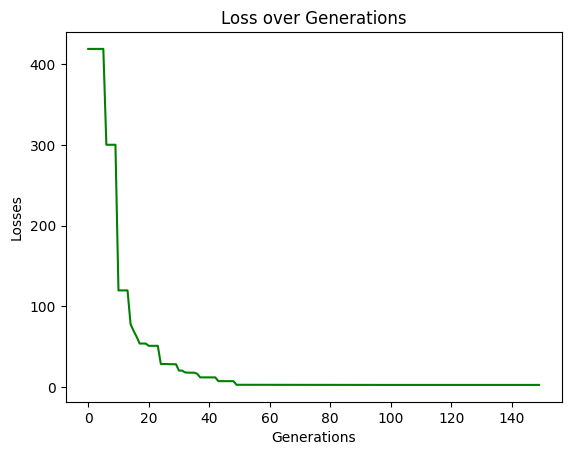

In [80]:
def visualize_loss(losses_list) :
    plt.plot(range(len(losses_list)), losses_list, color='green')
    plt.xlabel('Generations')
    plt.ylabel('Losses')
    plt.title('Loss over Generations')
    plt.show()
    
losses_list, _ = run_GA()
visualize_loss( losses_list )

Best loss: 1395.6622814015154  with chromsome:  [4.634768532126831, 0.3417157890132003, 0.018546015274316652, -1.33626071363346]
Best loss: 1395.6622814015154  with chromsome:  [4.634768532126831, 0.3417157890132003, 0.018546015274316652, -1.33626071363346]
Best loss: 877.2271470124618  with chromsome:  [-4.218749490360065, 0.22421232993236018, 0.345924172266022, 0.11174855725352817]
Best loss: 877.2271470124618  with chromsome:  [-4.218749490360065, 0.22421232993236018, 0.345924172266022, 0.11174855725352817]
Best loss: 317.7619245064228  with chromsome:  [-4.218749490360065, 0.22421232993236018, -0.3868945531776955, 0.11174855725352817]
Best loss: 317.7619245064228  with chromsome:  [-4.218749490360065, 0.22421232993236018, -0.3868945531776955, 0.11174855725352817]
Best loss: 311.30685951766424  with chromsome:  [-3.6431124182318806, 0.22421232993236018, -0.5885665881370583, 0.11174855725352817]
Best loss: 311.30685951766424  with chromsome:  [-3.6431124182318806, 0.22421232993236018

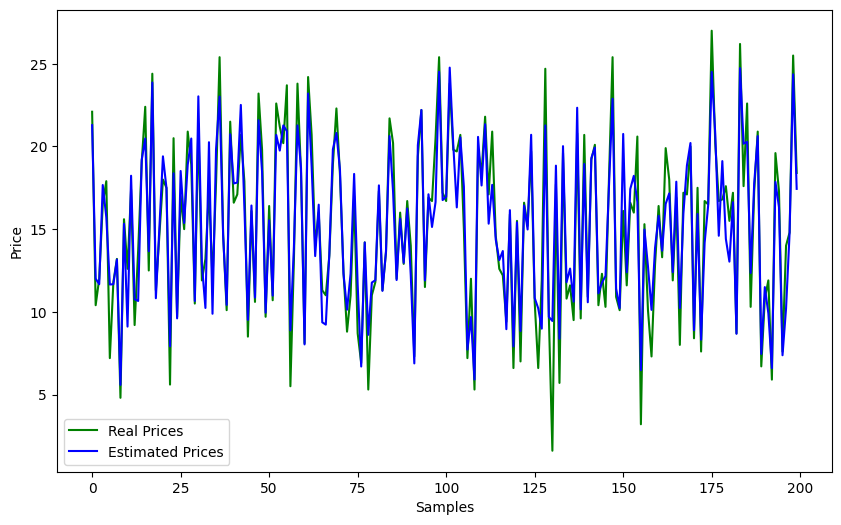

In [81]:
def visualize_predict_gt():
    losses_list, population = run_GA()
    sorted_population = sorted(population, key=compute_fitness)
    print("Best chromosome:", sorted_population[-1])
    theta = np.array(sorted_population[-1])
    
    estimated_prices = [np.dot(feature, theta) for feature in features_X]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, color='green', label='Real Prices')
    plt.plot(estimated_prices, color='blue', label='Estimated Prices')
    plt.legend()
    plt.show()
    
visualize_predict_gt()